# Data Science and Machine Learning Bootcamp

### Data Analysis with Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("athlete_events.csv")
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [4]:
data.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [5]:
data.rename(columns={"ID": "Id", "NOC": "Country"}, inplace=True)

In [6]:
data.head(1)

,Id,Name,Sex,Age,Height,Weight,Team,Country,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN


In [7]:
data = data.drop(["Id", "Games"], axis=1)
data.head(1)

,Name,Sex,Age,Height,Weight,Team,Country,Year,Season,City,Sport,Event,Medal
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN


In [8]:
unique_event = pd.unique(data.Event)
print("Eşsiz etkinlik sayısı: {}".format(len(unique_event)))
unique_event[:5]

Eşsiz etkinlik sayısı: 765


array(["Basketball Men's Basketball", "Judo Men's Extra-Lightweight",
       "Football Men's Football", "Tug-Of-War Men's Tug-Of-War",
       "Speed Skating Women's 500 metres"], dtype=object)

In [9]:
## Her eşsiz etkinlik üzerinde hesaplama yapıp, kayıp olan boy ve kilo verilerini tamamla.

temporary_data = data.copy()
hw_list = ["Height", "Weight"]

for e in unique_event:
    filter_event = temporary_data.Event == e
    filter_data = temporary_data[filter_event]
    
    for h in hw_list:
        mean = np.round(np.mean(filter_data[h]), 2)
        if ~np.isnan(mean):
            filter_data[h] = filter_data[h].fillna(mean)
        else:
            all_data_mean = np.round(np.mean(data[h]), 2)
            filter_data[h] = filter_data[h].fillna(all_data_mean)
    temporary_data[filter_event] = filter_data
    
data = temporary_data.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Name     271116 non-null  object 
 1   Sex      271116 non-null  object 
 2   Age      261642 non-null  float64
 3   Height   271116 non-null  float64
 4   Weight   271116 non-null  float64
 5   Team     271116 non-null  object 
 6   Country  271116 non-null  object 
 7   Year     271116 non-null  int64  
 8   Season   271116 non-null  object 
 9   City     271116 non-null  object 
 10  Sport    271116 non-null  object 
 11  Event    271116 non-null  object 
 12  Medal    39783 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


In [10]:
## Kayıp olan yaş verilerini tamamla.

age_mean = np.round(np.mean(data.Age), 2)
print("Yaş ortalaması: {}".format(age_mean))
data["Age"] = data["Age"].fillna(age_mean)
data.info()

Yaş ortalaması: 25.56
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Name     271116 non-null  object 
 1   Sex      271116 non-null  object 
 2   Age      271116 non-null  float64
 3   Height   271116 non-null  float64
 4   Weight   271116 non-null  float64
 5   Team     271116 non-null  object 
 6   Country  271116 non-null  object 
 7   Year     271116 non-null  int64  
 8   Season   271116 non-null  object 
 9   City     271116 non-null  object 
 10  Sport    271116 non-null  object 
 11  Event    271116 non-null  object 
 12  Medal    39783 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


In [11]:
medals = data["Medal"]
pd.isnull(medals).sum()

231333

In [12]:
medals_filter = ~pd.isnull(medals)

In [13]:
data = data[medals_filter]
data.head()

,Name,Sex,Age,Height,Weight,Team,Country,Year,Season,City,Sport,Event,Medal
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39783 entries, 3 to 271103
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Name     39783 non-null  object 
 1   Sex      39783 non-null  object 
 2   Age      39783 non-null  float64
 3   Height   39783 non-null  float64
 4   Weight   39783 non-null  float64
 5   Team     39783 non-null  object 
 6   Country  39783 non-null  object 
 7   Year     39783 non-null  int64  
 8   Season   39783 non-null  object 
 9   City     39783 non-null  object 
 10  Sport    39783 non-null  object 
 11  Event    39783 non-null  object 
 12  Medal    39783 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 4.2+ MB


In [15]:
data.to_csv("clean_athletes.csv", index=False)

In [16]:
## Histogram fonksiyonu
def plotHist(variable):
    plt.figure()
    plt.hist(data[variable], bins=75, color="purple")
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("Veri Sıklığı - {}".format(variable))
    plt.show()

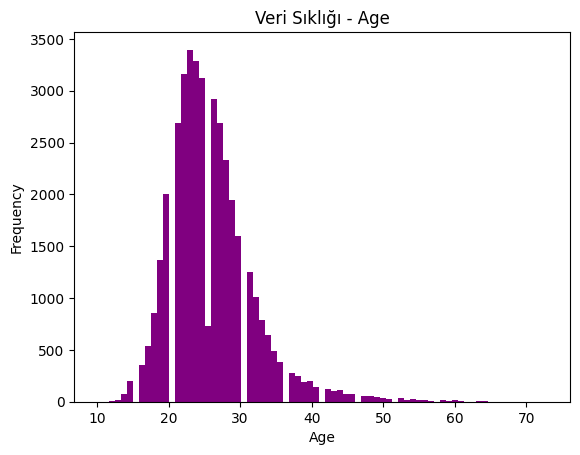

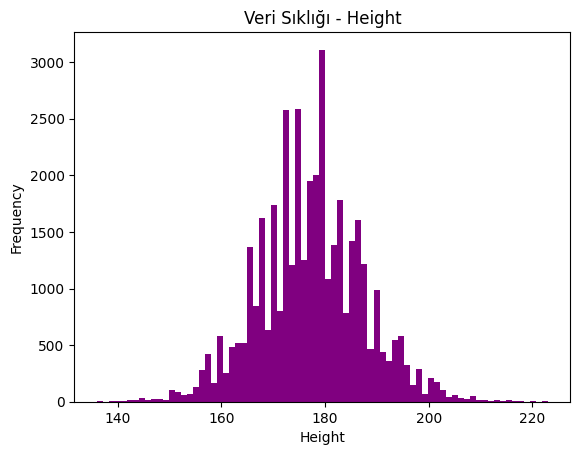

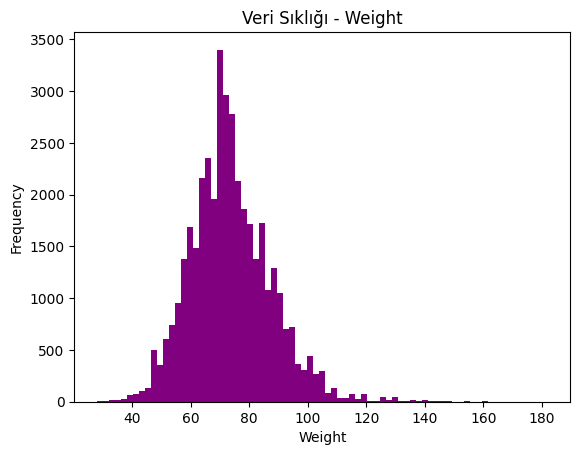

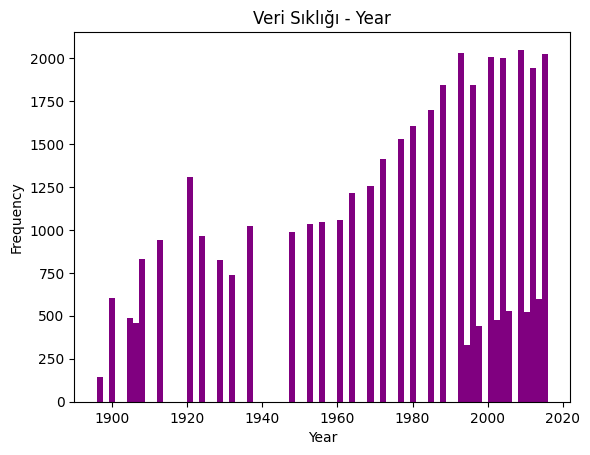

In [17]:
numeric_variable = ["Age", "Height", "Weight", "Year"]
for n in numeric_variable:
    plotHist(n)

In [18]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,39783.0,25.918456,5.859569,10.0,22.0,25.00,29.0,73.0
Height,39783.0,177.336690,10.170124,136.0,170.0,177.48,184.0,223.0
Weight,39783.0,73.738320,13.979041,28.0,64.0,73.00,82.0,182.0
Year,39783.0,1973.943845,33.822857,1896.0,1952.0,1984.00,2002.0,2016.0


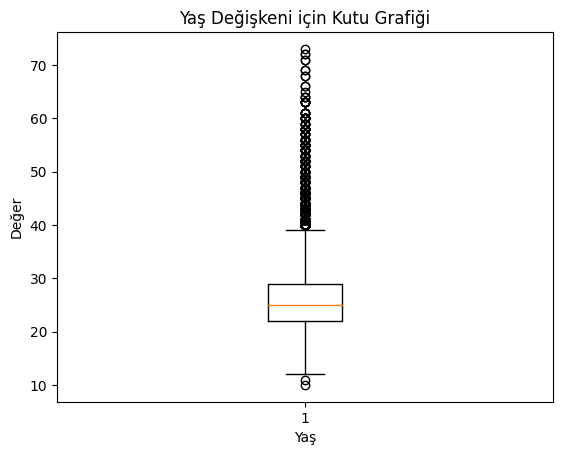

In [19]:
plt.boxplot(data.Age)
plt.title("Yaş Değişkeni için Kutu Grafiği")
plt.xlabel("Yaş")
plt.ylabel("Değer")
plt.show()

In [20]:
def plotBar(variable, n=5):
    data_ = data[variable]
    data_count = data_.value_counts()
    data_count = data_count[:n]
    plt.figure()
    plt.bar(data_count.index, data_count, color="orange")
    plt.xticks(data_count.index, data_count.index.values)
    plt.xticks(rotation=45)
    plt.ylabel("Frekans")
    plt.title("Veri Sıklığı - {}".format(variable))
    plt.show()
    print("{}: \n{}".format(variable, data_count))

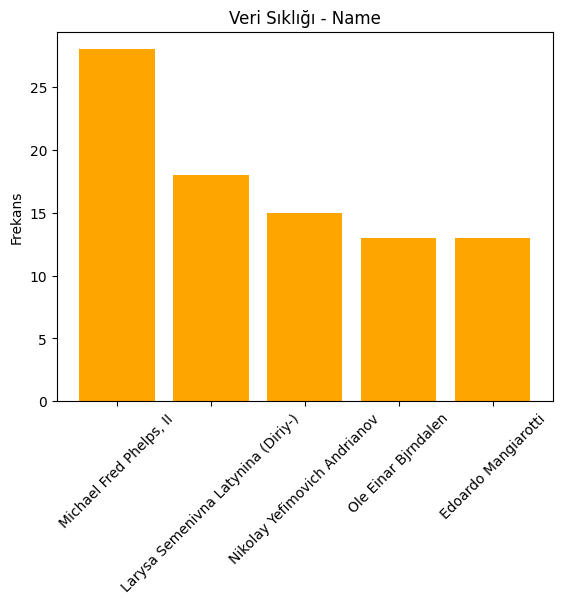

Name: 
Michael Fred Phelps, II               28
Larysa Semenivna Latynina (Diriy-)    18
Nikolay Yefimovich Andrianov          15
Ole Einar Bjrndalen                   13
Edoardo Mangiarotti                   13
Name: Name, dtype: int64


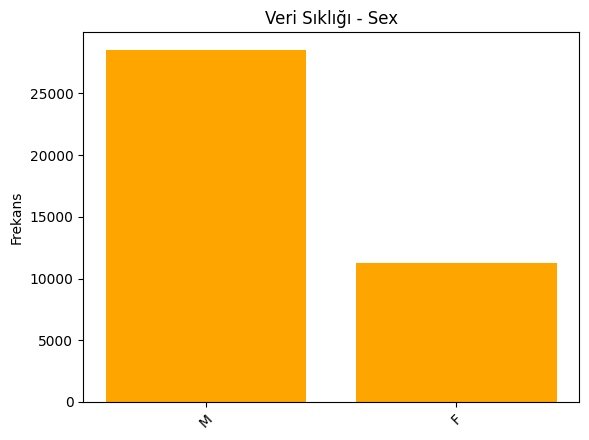

Sex: 
M    28530
F    11253
Name: Sex, dtype: int64


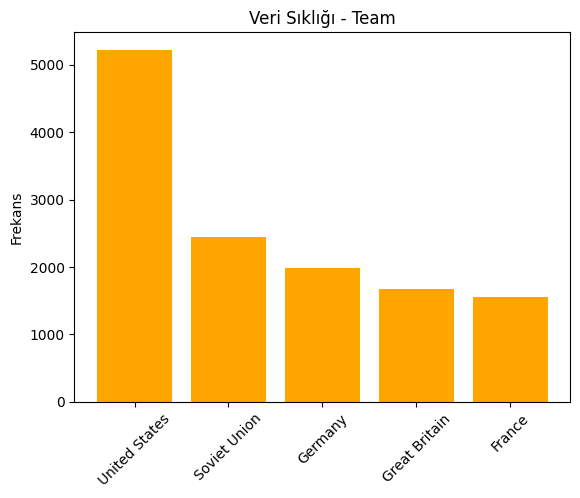

Team: 
United States    5219
Soviet Union     2451
Germany          1984
Great Britain    1673
France           1550
Name: Team, dtype: int64


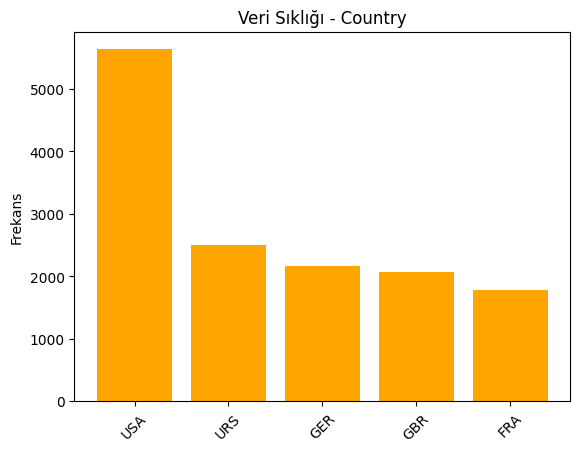

Country: 
USA    5637
URS    2503
GER    2165
GBR    2068
FRA    1777
Name: Country, dtype: int64


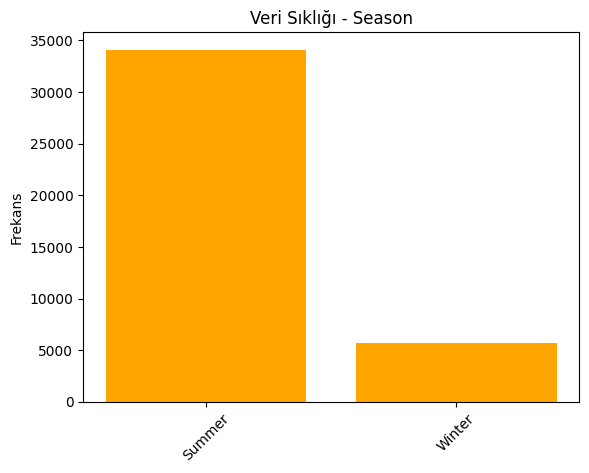

Season: 
Summer    34088
Winter     5695
Name: Season, dtype: int64


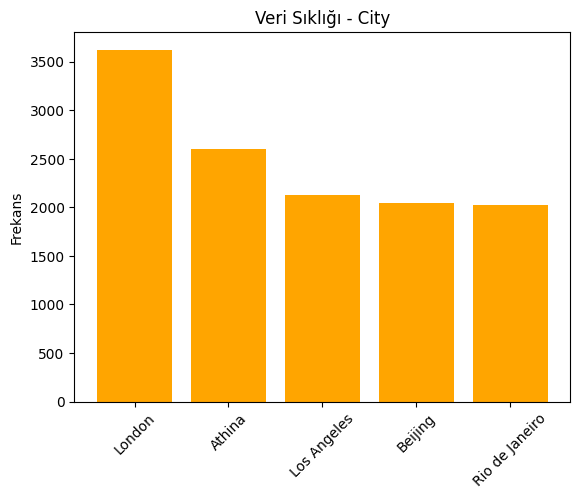

City: 
London            3624
Athina            2602
Los Angeles       2123
Beijing           2048
Rio de Janeiro    2023
Name: City, dtype: int64


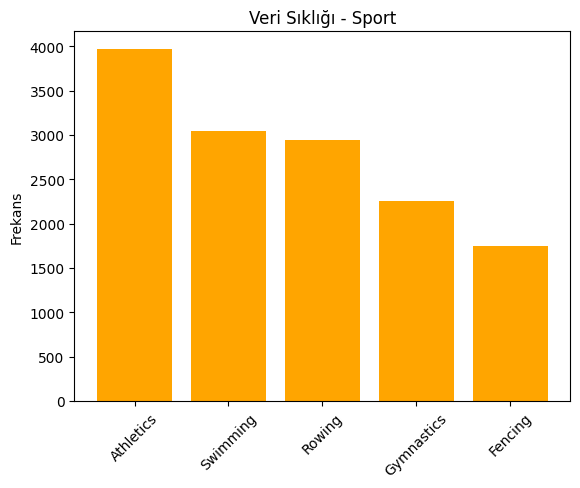

Sport: 
Athletics     3969
Swimming      3048
Rowing        2945
Gymnastics    2256
Fencing       1743
Name: Sport, dtype: int64


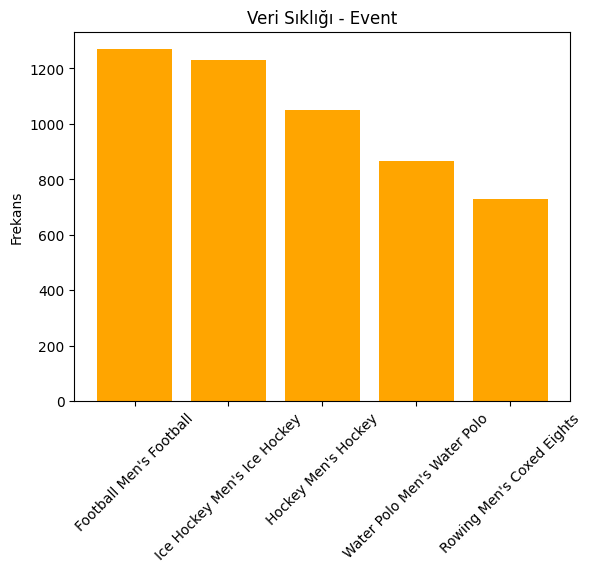

Event: 
Football Men's Football        1269
Ice Hockey Men's Ice Hockey    1230
Hockey Men's Hockey            1050
Water Polo Men's Water Polo     866
Rowing Men's Coxed Eights       730
Name: Event, dtype: int64


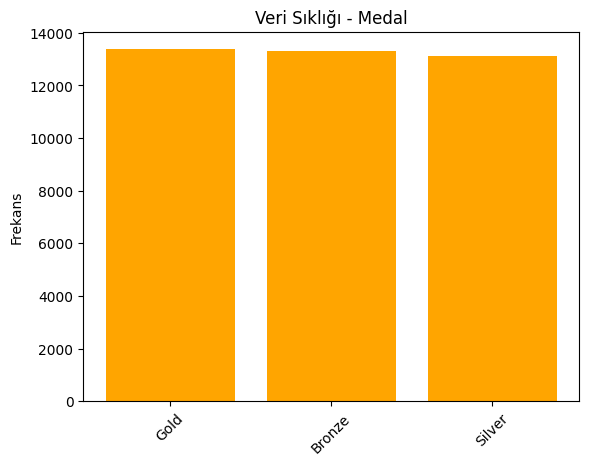

Medal: 
Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64


In [21]:
categorical_variable = ["Name", "Sex", "Team", "Country", "Season", "City", "Sport", "Event", "Medal"]
for i in categorical_variable:
    plotBar(i)

In [22]:
male = data[data.Sex == "M"]
male.head(3)

,Name,Sex,Age,Height,Weight,Team,Country,Year,Season,City,Sport,Event,Medal
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze


In [23]:
female = data[data.Sex == "F"]
female.head(3)

,Name,Sex,Age,Height,Weight,Team,Country,Year,Season,City,Sport,Event,Medal
79,Ragnhild Margrethe Aamodt,F,27.0,163.00,68.88,Norway,NOR,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold
91,Willemien Aardenburg,F,22.0,166.13,60.53,Netherlands,NED,1988,Summer,Seoul,Hockey,Hockey Women's Hockey,Bronze
105,Ann Kristin Aarnes,F,23.0,182.00,64.00,Norway,NOR,1996,Summer,Atlanta,Football,Football Women's Football,Bronze


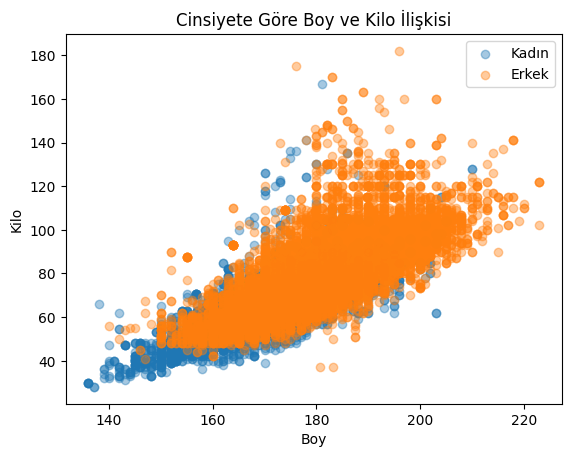

In [24]:
plt.figure()
plt.scatter(female.Height, female.Weight, alpha=0.4, label="Kadın")
plt.scatter(male.Height, male.Weight, alpha=0.4, label="Erkek")
plt.xlabel("Boy")
plt.ylabel("Kilo")
plt.title("Cinsiyete Göre Boy ve Kilo İlişkisi")
plt.legend()
plt.show()

In [25]:
data.loc[:,["Age", "Height", "Weight"]].corr()

,Age,Height,Weight
Age,1.000000,0.061890,0.136349
Height,0.061890,1.000000,0.794368
Weight,0.136349,0.794368,1.000000


In [26]:
data_temporary = data.copy()
data_temporary = pd.get_dummies(data_temporary, columns=["Medal"])
data_temporary.head(3)

,Name,Sex,Age,Height,Weight,Team,Country,Year,Season,City,Sport,Event,Medal_Bronze,Medal_Gold,Medal_Silver
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,0,1,0
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,1,0,0
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,1,0,0


In [27]:
data_temporary.loc[:,["Age", "Medal_Bronze", "Medal_Gold", "Medal_Silver"]].corr()

,Age,Medal_Bronze,Medal_Gold,Medal_Silver
Age,1.000000,-0.005584,-0.002576,0.008192
Medal_Bronze,-0.005584,1.000000,-0.504110,-0.496859
Medal_Gold,-0.002576,-0.504110,1.000000,-0.499022
Medal_Silver,0.008192,-0.496859,-0.499022,1.000000


In [28]:
data_temporary[["Team", "Medal_Bronze", "Medal_Gold", "Medal_Silver"]].groupby(["Team"], as_index=False).sum().sort_values(by="Medal_Gold", ascending=False)[:10]

,Team,Medal_Bronze,Medal_Gold,Medal_Silver
462,United States,1233,2474,1512
403,Soviet Union,677,1058,716
165,Germany,678,679,627
215,Italy,484,535,508
171,Great Britain,572,519,582
149,France,577,455,518
420,Sweden,507,451,476
198,Hungary,365,432,330
67,Canada,408,422,413
117,East Germany,263,369,309


In [29]:
data_temporary[["City", "Medal_Bronze", "Medal_Gold", "Medal_Silver"]].groupby(["City"], as_index=False).sum().sort_values(by="Medal_Gold", ascending=False)[:10]

,City,Medal_Bronze,Medal_Gold,Medal_Silver
17,London,1214,1215,1195
3,Athina,860,883,859
18,Los Angeles,706,726,691
6,Beijing,710,671,667
27,Rio de Janeiro,703,665,655
38,Sydney,680,663,661
4,Atlanta,629,608,605
5,Barcelona,604,559,549
33,Seoul,549,520,513
2,Antwerpen,367,493,448


In [30]:
data_temporary[["Sex", "Medal_Bronze", "Medal_Gold", "Medal_Silver"]].groupby(["Sex"], as_index=False).sum().sort_values(by="Medal_Gold", ascending=False)

,Sex,Medal_Bronze,Medal_Gold,Medal_Silver
1,M,9524,9625,9381
0,F,3771,3747,3735


In [31]:
data_pivot = data.pivot_table(index="Medal", columns="Sex",
                             values=["Height", "Weight", "Age"],
                             aggfunc={"Height":np.mean, "Weight":np.mean, "Age":[min,max,np.std]})
data_pivot.head()

Age                                            Height              \
         max         min             std                  mean               
Sex        F     M     F     M         F         M           F           M   
Medal                                                                        
Bronze  69.0  72.0  12.0  10.0  5.329229  5.870340  170.003227  180.045806   
Gold    63.0  64.0  13.0  13.0  5.219615  5.987807  170.448727  180.318906   
Silver  55.0  73.0  11.0  13.0  5.253111  6.098221  170.233783  180.053626   

           Weight             
             mean             
Sex             F          M  
Medal                         
Bronze  62.757125  77.841504  
Gold    63.199349  78.186505  
Silver  62.866892  77.960887

In [32]:
def anomalyDetect(df, feature):
    outlier_indices = []
    
    for f in feature:
        Q1 = np.percentile(df[f], 25)
        Q3 = np.percentile(df[f], 75)
        IQR = Q3 - Q1
        
        outlier_step = 1.5 * IQR
        outlier_list_col = df[(df[f] < Q1 - outlier_step) | (df[f] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 1)

    return multiple_outliers

In [33]:
data_anomaly = data.loc[anomalyDetect(data, ["Age", "Weight", "Height"])]
data_anomaly.Sport.value_counts()

Basketball        64
Gymnastics        34
Handball           6
Athletics          5
Sailing            3
Diving             3
Shooting           1
Figure Skating     1
Wrestling          1
Name: Sport, dtype: int64

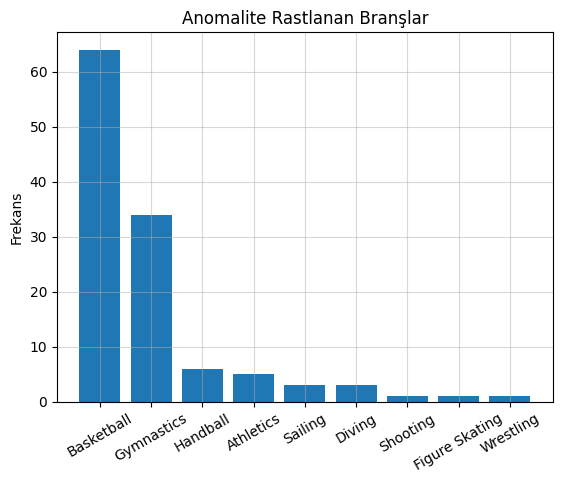

In [34]:
plt.figure()
plt.bar(data_anomaly.Sport.value_counts().index, data_anomaly.Sport.value_counts())
plt.xticks(rotation=30)
plt.title("Anomalite Rastlanan Branşlar")
plt.ylabel("Frekans")
plt.grid(True, alpha=0.5)
plt.show()

In [35]:
data_gym = data_anomaly[data_anomaly.Sport == "Gymnastics"]
data_gym.head()

,Name,Sex,Age,Height,Weight,Team,Country,Year,Season,City,Sport,Event,Medal
13741,Oana Mihaela Ban,F,18.0,139.0,36.0,Romania,ROU,2004,Summer,Athina,Gymnastics,Gymnastics Women's Team All-Around,Gold
21260,Bi Wenjing,F,14.0,142.0,35.0,China,CHN,1996,Summer,Atlanta,Gymnastics,Gymnastics Women's Uneven Bars,Silver
23763,Loredana Boboc,F,16.0,139.0,32.0,Romania,ROU,2000,Summer,Sydney,Gymnastics,Gymnastics Women's Team All-Around,Gold
47452,Laura Cutina,F,15.0,143.0,36.0,Romania,ROU,1984,Summer,Los Angeles,Gymnastics,Gymnastics Women's Team All-Around,Gold
53751,Deng Linlin,F,16.0,144.0,34.0,China,CHN,2008,Summer,Beijing,Gymnastics,Gymnastics Women's Team All-Around,Gold


In [36]:
data_gym.Event.value_counts()

Gymnastics Women's Team All-Around          21
Gymnastics Women's Uneven Bars               6
Gymnastics Women's Balance Beam              3
Gymnastics Women's Floor Exercise            2
Gymnastics Women's Individual All-Around     1
Gymnastics Women's Horse Vault               1
Name: Event, dtype: int64

In [37]:
data_basketball = data_anomaly[data_anomaly.Sport == "Basketball"]
data_basketball.head()

,Name,Sex,Age,Height,Weight,Team,Country,Year,Season,City,Sport,Event,Medal
8834,Franjo Arapovi,M,23.0,211.0,120.0,Yugoslavia,YUG,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Silver
8835,Franjo Arapovi,M,27.0,211.0,120.0,Croatia,CRO,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Silver
21577,Oleksandr Mykhailovych Bielostienniy,M,21.0,214.0,117.0,Soviet Union,URS,1980,Summer,Moskva,Basketball,Basketball Men's Basketball,Bronze
21578,Oleksandr Mykhailovych Bielostienniy,M,29.0,214.0,117.0,Soviet Union,URS,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Gold
25598,"Carlos Austin Boozer, Jr.",M,22.0,206.0,117.0,United States,USA,2004,Summer,Athina,Basketball,Basketball Men's Basketball,Bronze


In [38]:
data_basketball.Event.value_counts()

Basketball Men's Basketball      62
Basketball Women's Basketball     2
Name: Event, dtype: int64

In [39]:
data_time = data.copy()
data_time.head(3)

,Name,Sex,Age,Height,Weight,Team,Country,Year,Season,City,Sport,Event,Medal
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze


In [40]:
unique_years = np.sort(data_time.Year.unique())
unique_years

array([1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936,
       1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988,
       1992, 1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012,
       2014, 2016], dtype=int64)

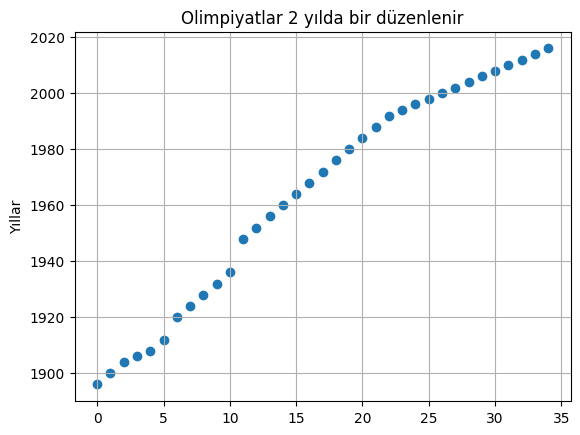

In [41]:
plt.figure()
plt.scatter(range(len(unique_years)), unique_years)
plt.grid(True)
plt.ylabel("Yıllar")
plt.title("Olimpiyatlar 2 yılda bir düzenlenir")
plt.show()

In [42]:
date = pd.to_datetime(data_time["Year"], format="%Y")
print(type(date))
date.head(3)

<class 'pandas.core.series.Series'>


3    1900-01-01
37   1920-01-01
38   1920-01-01
Name: Year, dtype: datetime64[ns]

In [43]:
data_time["Date_Time"] = date
data_time.head(3)

,Name,Sex,Age,Height,Weight,Team,Country,Year,Season,City,Sport,Event,Medal,Date_Time
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1900-01-01
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,1920-01-01
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,1920-01-01


In [44]:
data_time = data_time.set_index("Date_Time")
data_time.drop(["Year"], axis=1, inplace=True)
data_time.head(3)

,Name,Sex,Age,Height,Weight,Team,Country,Season,City,Sport,Event,Medal
Date_Time,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1920-01-01,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
1920-01-01,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze


In [45]:
data_period = data_time.resample("2A").mean()
data_period.head()

,Age,Height,Weight
Date_Time,,,
1896-12-31,23.905734,174.280350,72.734056
1898-12-31,NaN,NaN,NaN
1900-12-31,27.786689,177.882301,74.979950
1902-12-31,NaN,NaN,NaN
1904-12-31,26.363868,177.241091,74.330823


In [46]:
data_period.dropna(axis=0, inplace=True)
data_period.head()

,Age,Height,Weight
Date_Time,,,
1896-12-31,23.905734,174.280350,72.734056
1900-12-31,27.786689,177.882301,74.979950
1904-12-31,26.363868,177.241091,74.330823
1906-12-31,26.479389,176.347576,74.072183
1908-12-31,27.566739,176.662419,73.721107


<Figure size 640x480 with 0 Axes>

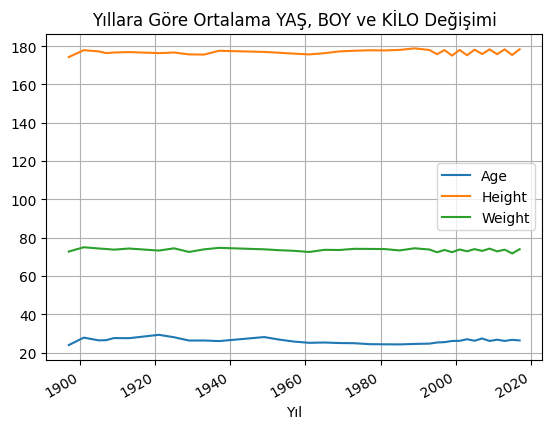

In [47]:
plt.figure()
data_period.plot()
plt.title("Yıllara Göre Ortalama YAŞ, BOY ve KİLO Değişimi")
plt.xlabel("Yıl")
plt.grid(True)
plt.show()

In [48]:
data_time = pd.get_dummies(data_time, columns=["Medal"])
data_time.head(3)

,Name,Sex,Age,Height,Weight,Team,Country,Season,City,Sport,Event,Medal_Bronze,Medal_Gold,Medal_Silver
Date_Time,,,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,0,1,0
1920-01-01,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,1,0,0
1920-01-01,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,1,0,0


In [49]:
data_period = data_time.resample("2A").sum()
data_period = data_period[~(data_period == 0).any(axis=1)]
data_period.tail()

,Age,Height,Weight,Medal_Bronze,Medal_Gold,Medal_Silver
Date_Time,,,,,,
2008-12-31,53344.0,365157.91,152090.92,710,671,667
2010-12-31,13896.0,91395.00,37877.12,171,174,175
2012-12-31,50595.0,346091.47,143102.94,679,632,630
2014-12-31,15907.0,104686.00,42838.63,198,202,197
2016-12-31,53256.0,360846.03,149628.71,703,665,655


<Figure size 640x480 with 0 Axes>

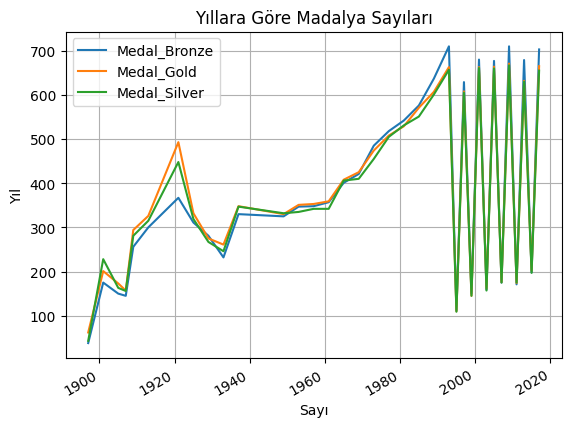

In [50]:
plt.figure()
data_period.loc[:,["Medal_Bronze", "Medal_Gold", "Medal_Silver"]].plot()
plt.title("Yıllara Göre Madalya Sayıları")
plt.xlabel("Sayı")
plt.ylabel("Yıl")
plt.grid(True)
plt.show()

In [51]:
summer = data_time[data_time.Season == "Summer"]
winter = data_time[data_time.Season == "Winter"]
winter.head(3)

,Name,Sex,Age,Height,Weight,Team,Country,Season,City,Sport,Event,Medal_Bronze,Medal_Gold,Medal_Silver
Date_Time,,,,,,,,,,,,,,
2014-01-01,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,1,0,0
1992-01-01,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,0,1,0
1992-01-01,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Giant Slalom,1,0,0


In [52]:
data_period_winter = winter.resample("A").sum()
data_period_winter = data_period_winter[~(data_period_winter == 0).any(axis=1)]
data_period_winter.head()

,Age,Height,Weight,Medal_Bronze,Medal_Gold,Medal_Silver
Date_Time,,,,,,
1924-12-31,3919.60,22867.28,9703.58,37,55,38
1928-12-31,2265.56,15745.75,6862.50,31,30,28
1932-12-31,2431.00,16357.71,7067.76,28,32,32
1936-12-31,2742.00,19123.20,8101.88,35,36,37
1948-12-31,3643.00,23942.51,10375.92,46,41,48


In [53]:
data_period_summer = summer.resample("A").sum()
data_period_summer = data_period_summer[~(data_period_summer == 0).any(axis=1)]
data_period_summer.head()

,Age,Height,Weight,Medal_Bronze,Medal_Gold,Medal_Silver
Date_Time,,,,,,
1896-12-31,3418.52,24922.09,10400.97,38,62,43
1900-12-31,16783.16,107440.91,45287.89,175,201,228
1904-12-31,12812.84,86139.17,36124.78,150,173,163
1906-12-31,12127.56,80767.19,33925.06,145,157,156
1908-12-31,22907.96,146806.47,61262.24,256,294,281


<Figure size 640x480 with 0 Axes>

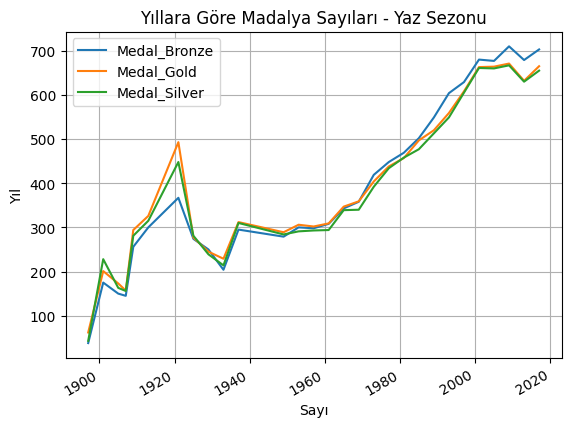

<Figure size 640x480 with 0 Axes>

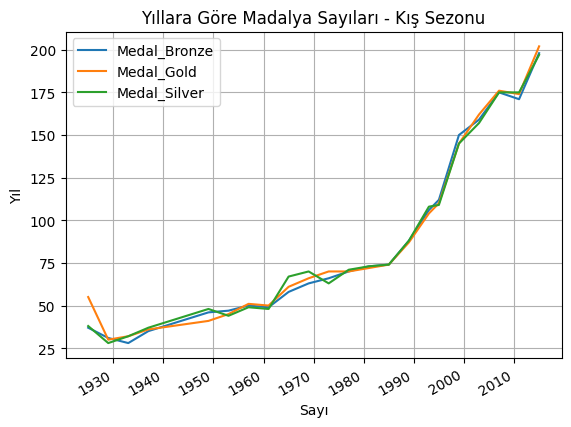

In [54]:
plt.figure()
data_period_summer.loc[:,["Medal_Bronze", "Medal_Gold", "Medal_Silver"]].plot()
plt.title("Yıllara Göre Madalya Sayıları - Yaz Sezonu")
plt.xlabel("Sayı")
plt.ylabel("Yıl")
plt.grid(True)
plt.show()

plt.figure()
data_period_winter.loc[:,["Medal_Bronze", "Medal_Gold", "Medal_Silver"]].plot()
plt.title("Yıllara Göre Madalya Sayıları - Kış Sezonu")
plt.xlabel("Sayı")
plt.ylabel("Yıl")
plt.grid(True)
plt.show()